<a href="https://colab.research.google.com/github/laresamdeola/Computer-Vision/blob/main/Image_Classification_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib
import os
import cv2 as cv

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import imghdr

In [40]:
data_dir = os.getcwd() + '/data/'

In [41]:
os.getcwd()

'/content'

In [42]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [43]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image /content/data/happy/MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
Issue with image /content/data/happy/image3.jpeg
Issue with image /content/data/happy/60632274._UY200_.jpg
Issue with image /content/data/happy/ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
Issue with image /content/data/happy/images9.jpg
Issue with image /content/data/happy/image21.jpeg
Issue with image /content/data/happy/blog_image_20180219221810890.jpg
Issue with image /content/data/happy/Top-Secrets-of-How-to-be-Happy.jpg
Issue with image /content/data/happy/images23.jpg
Issue with image /content/data/happy/images28.jpg
Issue with image /content/data/happy/how-happy-are-healthy-people.jpg
Issue with image /content/data/happy/maxresdefault.jpg
Issue with image /content/data/happy/image10.jpeg
Issue with image /content/data/happy/happiness.jpg
Issue with image /content/data/happy/image28.jpeg
Issue with image /content/data/happy/images20.jpg
Issue with image /content/data/happy/

In [44]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [46]:
data_iterator = data.as_numpy_iterator()

In [47]:
batch = data_iterator.next()

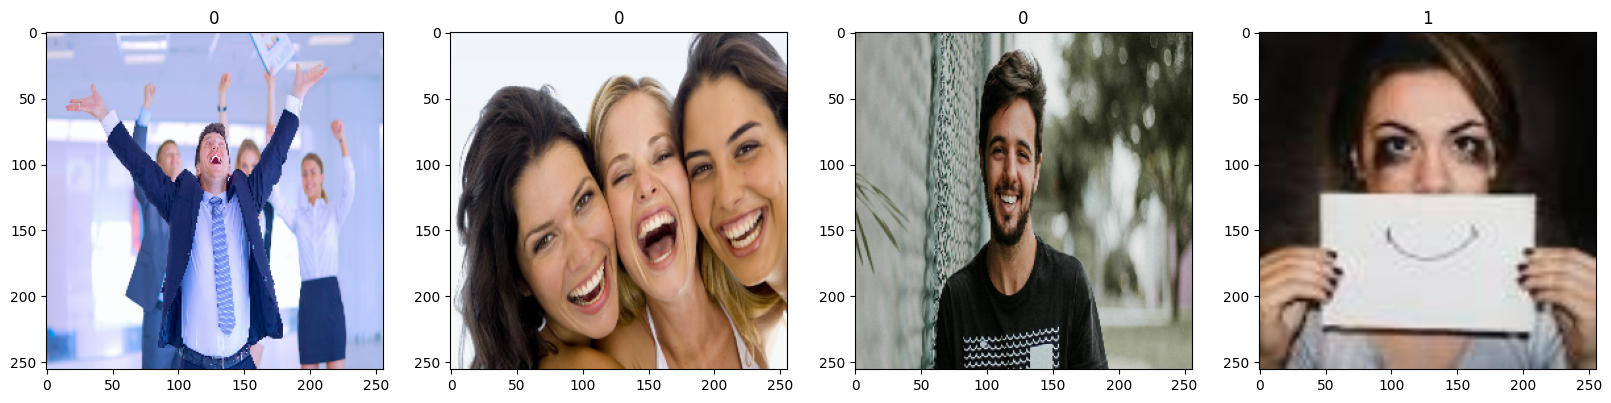

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])